<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Description
This project uses the [consumer complaint database](https://catalog.data.gov/dataset/consumer-complaint-database).

## Data Description
The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database. The database generally updates daily.

# Business Problem

<div class="alert alert-block alert-success">
<b>Business Problem:</b>  <br>
Task &nbsp;&nbsp; : Find the category of given complaint. <br>
Metric : IF-IDF <br>
Cleaning: Remove punctuations, expand contractions, etc <br>
Question: Which class the given complaint belongs to?
</div>

oad the serialized object make sure you have the 
same conda environment as it was when creating the serialized object.
</div>


**Term Frequency** : This gives how often a given word appears within a document.

$\mathrm{TF}=\frac{\text { Number of times the term appears in the doc }}{\text { Total number of words in the doc }}$

**Inverse Document Frequency**: This gives how often the word appers across the documents.
If a term is very common among documents (e.g., “the”, “a”, “is”),
then we have low IDF score.

$\mathrm{IDF}=\ln \left(\frac{\text { Number of docs }}{\text { Number docs the term appears in }}\right)$

**Term Frequency – Inverse Document Frequency TF-IDF**: 
TF-IDF is the product of the TF and IDF scores of the term.

$\mathrm{TF}-\mathrm{IDF}=\frac{\mathrm{TF}}{\mathrm{IDF}}$


In machine learning, TF-IDF is obtained from the class `TfidfVectorizer`.
It has following parameters:

- `min_df`: remove the words from the vocabulary which have occurred in less than "min_df"
number of files.
- `max_df`: remove the words from the vocabulary which have occurred in more than _{ maxdf" }
total number of files in corpus.
- `sublinear_tf`: set to True to scale the term frequency in logarithmic scale.
- `stop_words`: remove the predefined stop words in 'english':
- `use_idf`: weight factor must use inverse document frequency.
- `ngram_range`: (1,2) to indicate that unigrams and bigrams will be considered.

# Imports

In [83]:
import time
time_start_notebook = time.time()

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import tqdm

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') 

# random state
SEED=100

[(x.__name__,x.__version__) for x in [np,pd,sns,sklearn,tqdm]]

[('numpy', '1.18.4'),
 ('pandas', '1.0.3'),
 ('seaborn', '0.9.0'),
 ('sklearn', '0.23.0'),
 ('tqdm', '4.46.0')]

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [89]:
import joblib

In [90]:
#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

In [91]:
pd.options.display.max_colwidth = None

# Useful Scripts

In [129]:
def add_text_barplot(ax, decimals=4, rot=30,percent=False,comma=False):
    assert hasattr(ax,'patches')
    for p in ax.patches:
        txt = f"{p.get_height():,.2f}"
        txt = np.round(p.get_height(), decimals=decimals)
        
        if comma:
            if (int(txt)==txt):
                txt = "{:,}".format(int(txt))
            else:
                txt = "{:,.2f}".format(txt)
        
        txt = str(txt) + '%' if percent else txt
        x = p.get_x()+p.get_width()/2.
        y = p.get_height()
        ax.annotate(txt, (x,y), ha='center', va='center', 
                xytext=(0, 10), rotation=rot,textcoords='offset points')

# Load the data

In [92]:
!ls ../data

complaints.csv       complaints.csv.zip   data_clean.csv       id_to_product.csv    small_complaints.csv


In [125]:
df = pd.read_csv('../data/data_clean.csv')
df.head(2).append(df.tail(2))

,product,complaint,category_id,complaint_lst,complaint_clean
0,Mortgage,"Hello : ditech.com is my mortgage company. They placed an automatic forbearance on my account and removed my auto payment after Hurricane Irma. I called about a week after the storm to ask that they remove the forbearance and return the auto payment. This was confirm by the agent and recorded by them. I received a letter just a few weeks ago stating that my auto payment was never returned and the agent who I spoke with after I received the letter actually read back the notes confirming that I called and asked to have forbearance removed and auto payment reinstated. So I asked again the agent to remove the forbearance and install auto payment. \n\nI called this past week to check if this was done yet, and the agent at that time said I still have a forbearance and no auto payment. \n\nAs I right this complaint, I spoke with an agent today that informs me that I dont have auto payment and forbearance is still active. She placed me on hold, which has lasted an hour. \n\nDitech is not responsive, and it is purposely choosing to keep my in forbearance when I have asked countless times to remove me. I also have asked countless times to reinstate auto payment and yet they choose not to listen. \n\nPlease help XXXX XXXX, XXXX",0,"['helo', 'ditechcom', 'mortgage', 'company', 'placed', 'automatic', 'forbearance', 'acount', 'removed', 'auto', 'payment', 'huricane', 'irma', 'caled', 'wek', 'storm', 'ask', 'remove', 'forbearance', 'return', 'auto', 'payment', 'confirm', 'agent', 'recorded', 'received', 'leter', 'weks', 'ago', 'stating', 'auto', 'payment', 'never', 'returned', 'agent', 'spoke', 'received', 'leter', 'actualy', 'read', 'back', 'note', 'confirming', 'caled', 'asked', 'forbearance', 'removed', 'auto', 'payment', 'reinstated', 'asked', 'agent', 'remove', 'forbearance', 'instal', 'auto', 'payment', 'caled', 'past', 'wek', 'check', 'done', 'yet', 'agent', 'time', 'said', 'stil', 'forbearance', 'auto', 'payment', 'right', 'complaint', 'spoke', 'agent', 'today', 'informs', 'dont', 'auto', 'payment', 'forbearance', 'stil', 'active', 'placed', 'hold', 'lasted', 'hour', 'ditech', 'responsive', 'purposely', 'chosing', 'kep', 'forbearance', 'asked', 'countles', 'time', 'remove', 'also', 'asked', 'countles', 'time', 'reinstate', 'auto', 'payment', 'yet', 'chose', 'listen', 'please', 'help', 'xx', 'xx', 'xx']",helo ditechcom mortgage company placed automatic forbearance acount removed auto payment huricane irma caled wek storm ask remove forbearance return auto payment confirm agent recorded received leter weks ago stating auto payment never returned agent spoke received leter actualy read back note confirming caled asked forbearance removed auto payment reinstated asked agent remove forbearance instal auto payment caled past wek check done yet agent time said stil forbearance auto payment right complaint spoke agent today informs dont auto payment forbearance stil active placed hold lasted hour ditech responsive purposely chosing kep forbearance asked countles time remove also asked countles time reinstate auto payment yet chose listen please help xx xx xx
1,"Credit reporting, credit repair services, or other personal consumer reports","This a formal complaint against TransUnion regarding inaccuracy on my credit file. On XXXX XXXX, XXXX, I discovered that XXXX XXXX account number XXXX opened XXXX XXXX, XXXX is still being displayed on my credit report which is inaccurate. This account was disputed by me to be removed/deleted permanently from my credit file due to several proven inaccuracies. I contacted XXXX XXXX as well regarding this matter and I was informed that an "" account deletion '' was mailed to all three credit bureaus. Please delete this item immediately. This account was deleted between XXXX and XXXX by XXXX and XXXX which I have proof. I know that CRAs do not share credit information with one another and that it 's FCRA law that the furnishers update the

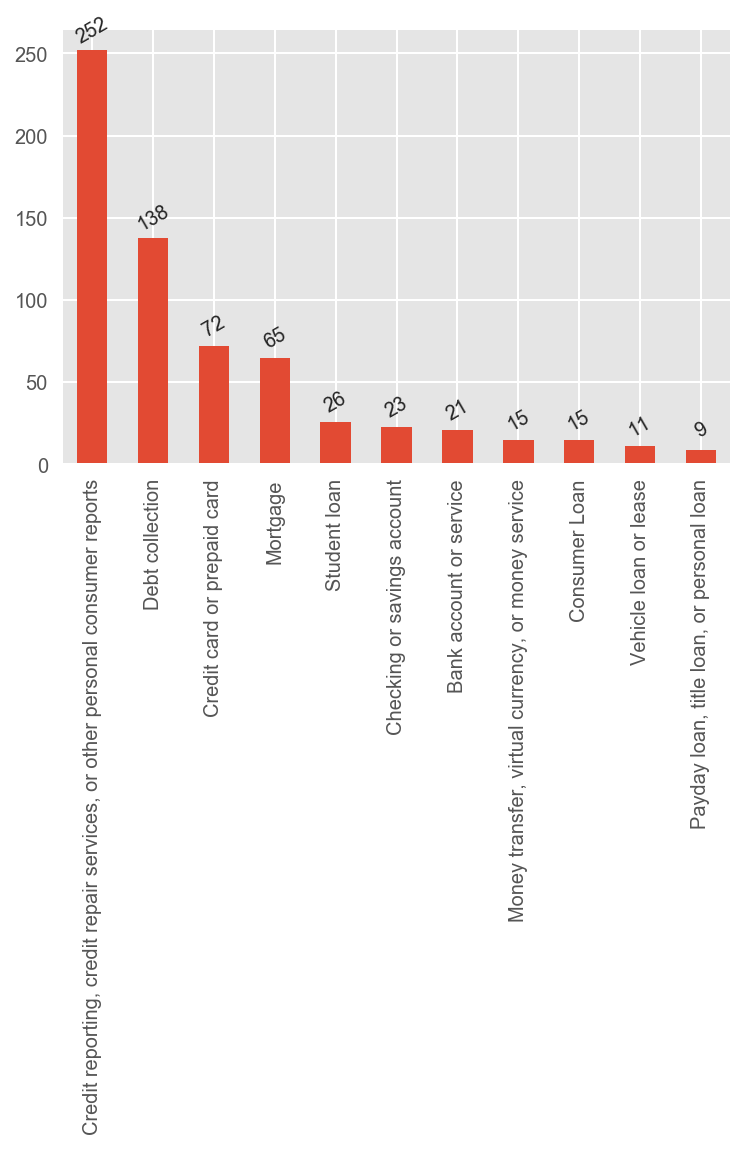

In [130]:
ax = df['product'].value_counts().plot.bar()
add_text_barplot(ax)

In [94]:
df_id_to_product = pd.read_csv('../data/id_to_product.csv')
ser_id_to_product = df_id_to_product.iloc[:,0]
ser_id_to_product

0                                                                         Mortgage
1     Credit reporting, credit repair services, or other personal consumer reports
2                                        Payday loan, title loan, or personal loan
3                                                      Credit card or prepaid card
4                                                      Checking or savings account
5                                                            Vehicle loan or lease
6                                                                  Debt collection
7                               Money transfer, virtual currency, or money service
8                                                                     Student loan
9                                                          Bank account or service
10                                                                   Consumer Loan
Name: 0, dtype: object

# Get vectorized data from text

In [95]:
%%time 
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# create vectors
features = tfidf.fit_transform(df['complaint_clean']).toarray()
labels = df['category_id']

CPU times: user 167 ms, sys: 9.98 ms, total: 177 ms
Wall time: 276 ms


# Train Test Split

In [96]:
%%time

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test,indices_train,indices_test = \
    train_test_split(features, labels, df.index,
                     test_size=0.25, random_state=SEED,stratify=labels)

y_train[:2]

CPU times: user 6.12 ms, sys: 3.92 ms, total: 10 ms
Wall time: 19.3 ms


544    1
41     3
Name: category_id, dtype: int64

In [97]:
sorted(y_train.unique()), sorted(y_test.unique())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Fit various Models

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [99]:
# ?RandomForestClassifier

In [100]:
models = [
    LogisticRegression(random_state=SEED),
    LinearSVC(),
    MultinomialNB(),
    
]

model_names = ['LogisticRegression', 'SVC', 'MultinomialNB']
dic_models = dict(zip(model_names,models))

for model_name, model in dic_models.items():
    print(model_name)

LogisticRegression
SVC
MultinomialNB


In [101]:
%%time

from sklearn.model_selection import cross_val_score

accs = []

for model in models:
    acc = cross_val_score(model, X_train, y_train,scoring='accuracy').mean()
    accs.append(acc)
    
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accs})
df_models

CPU times: user 2.72 s, sys: 247 ms, total: 2.97 s
Wall time: 1.23 s


,Model,Accuracy
0,LogisticRegression,0.558763
1,SVC,0.668041
2,MultinomialNB,0.430928


# Model Evaluation
- https://www.scikit-yb.org/en/latest/api/classifier/index.html

In [102]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [103]:
# Classification report
print(metrics.classification_report(y_test, y_pred, 
    target_names= df['product'].unique()))

                                                                              precision    recall  f1-score   support

                                                                    Mortgage       0.87      0.81      0.84        16
Credit reporting, credit repair services, or other personal consumer reports       0.76      0.87      0.81        63
                                   Payday loan, title loan, or personal loan       0.00      0.00      0.00         2
                                                 Credit card or prepaid card       0.52      0.61      0.56        18
                                                 Checking or savings account       0.67      0.33      0.44         6
                                                       Vehicle loan or lease       0.00      0.00      0.00         3
                                                             Debt collection       0.69      0.83      0.75        35
                          Money transfer, virtual curre

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


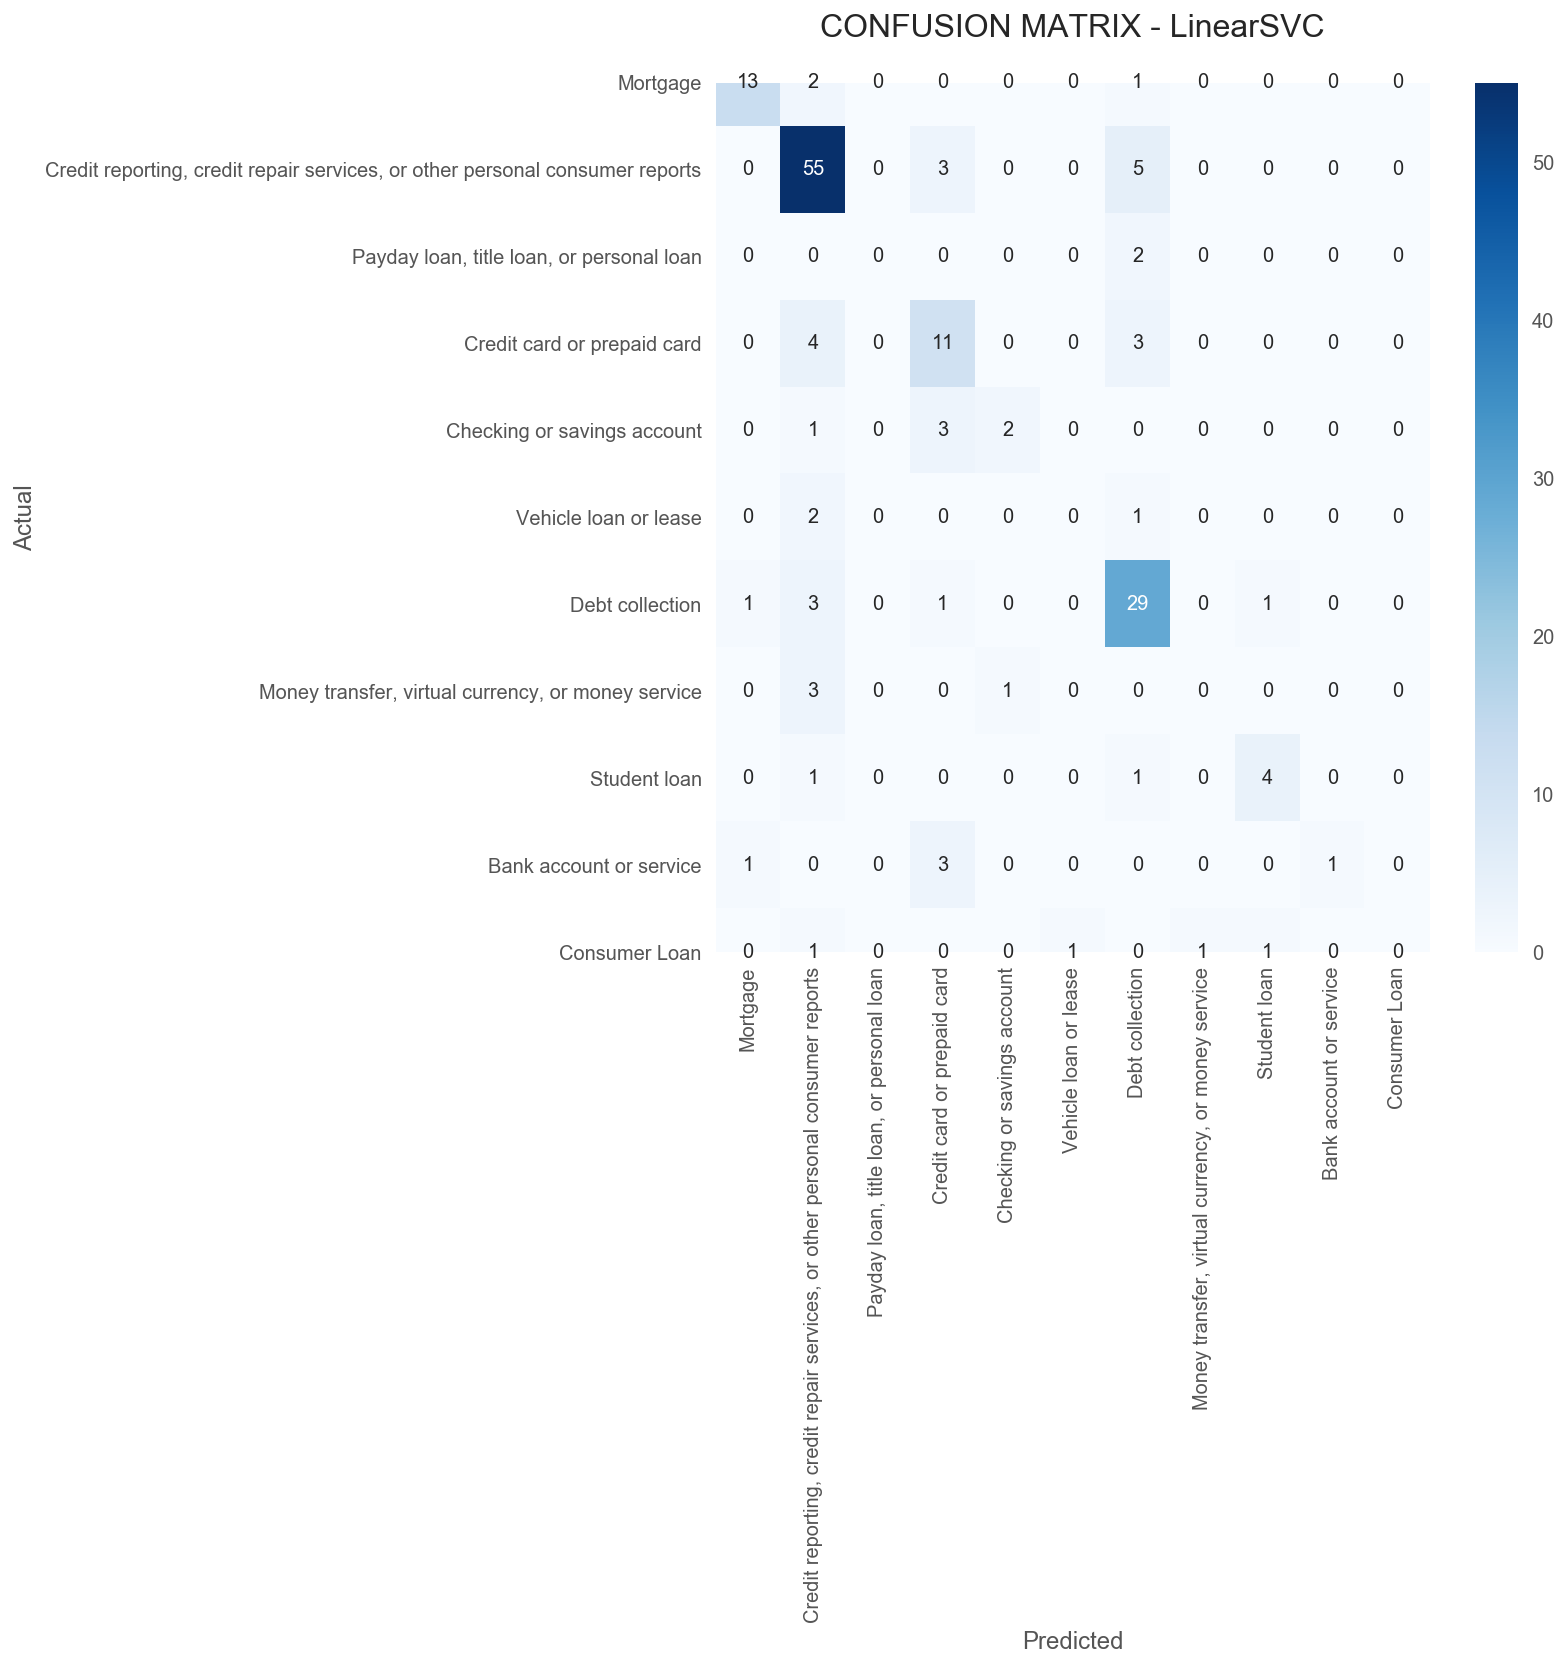

In [104]:
conf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=ser_id_to_product.values, 
            yticklabels=ser_id_to_product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [105]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

# select classifiers 
classifiers=[
LogisticRegression(random_state=SEED),
LinearSVC()
]

model = LinearSVC()
classes = ser_id_to_product.values

In [106]:
# ?ClassificationReport

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


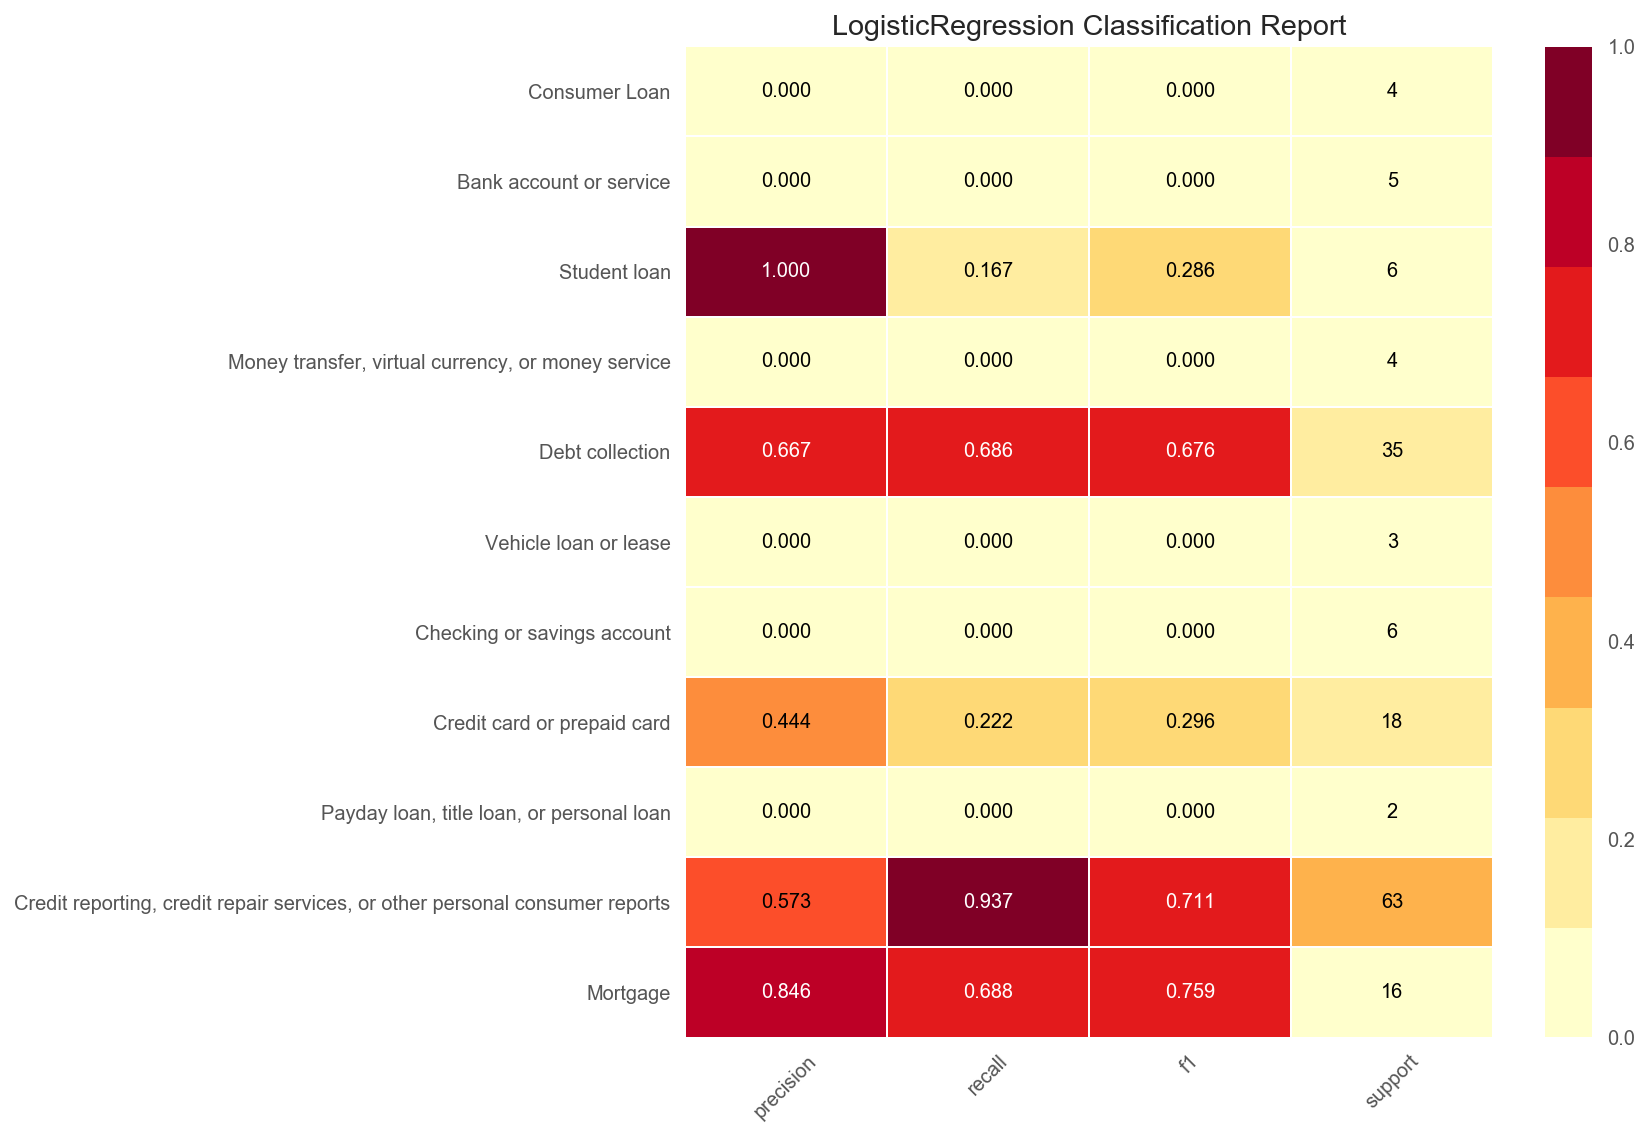

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


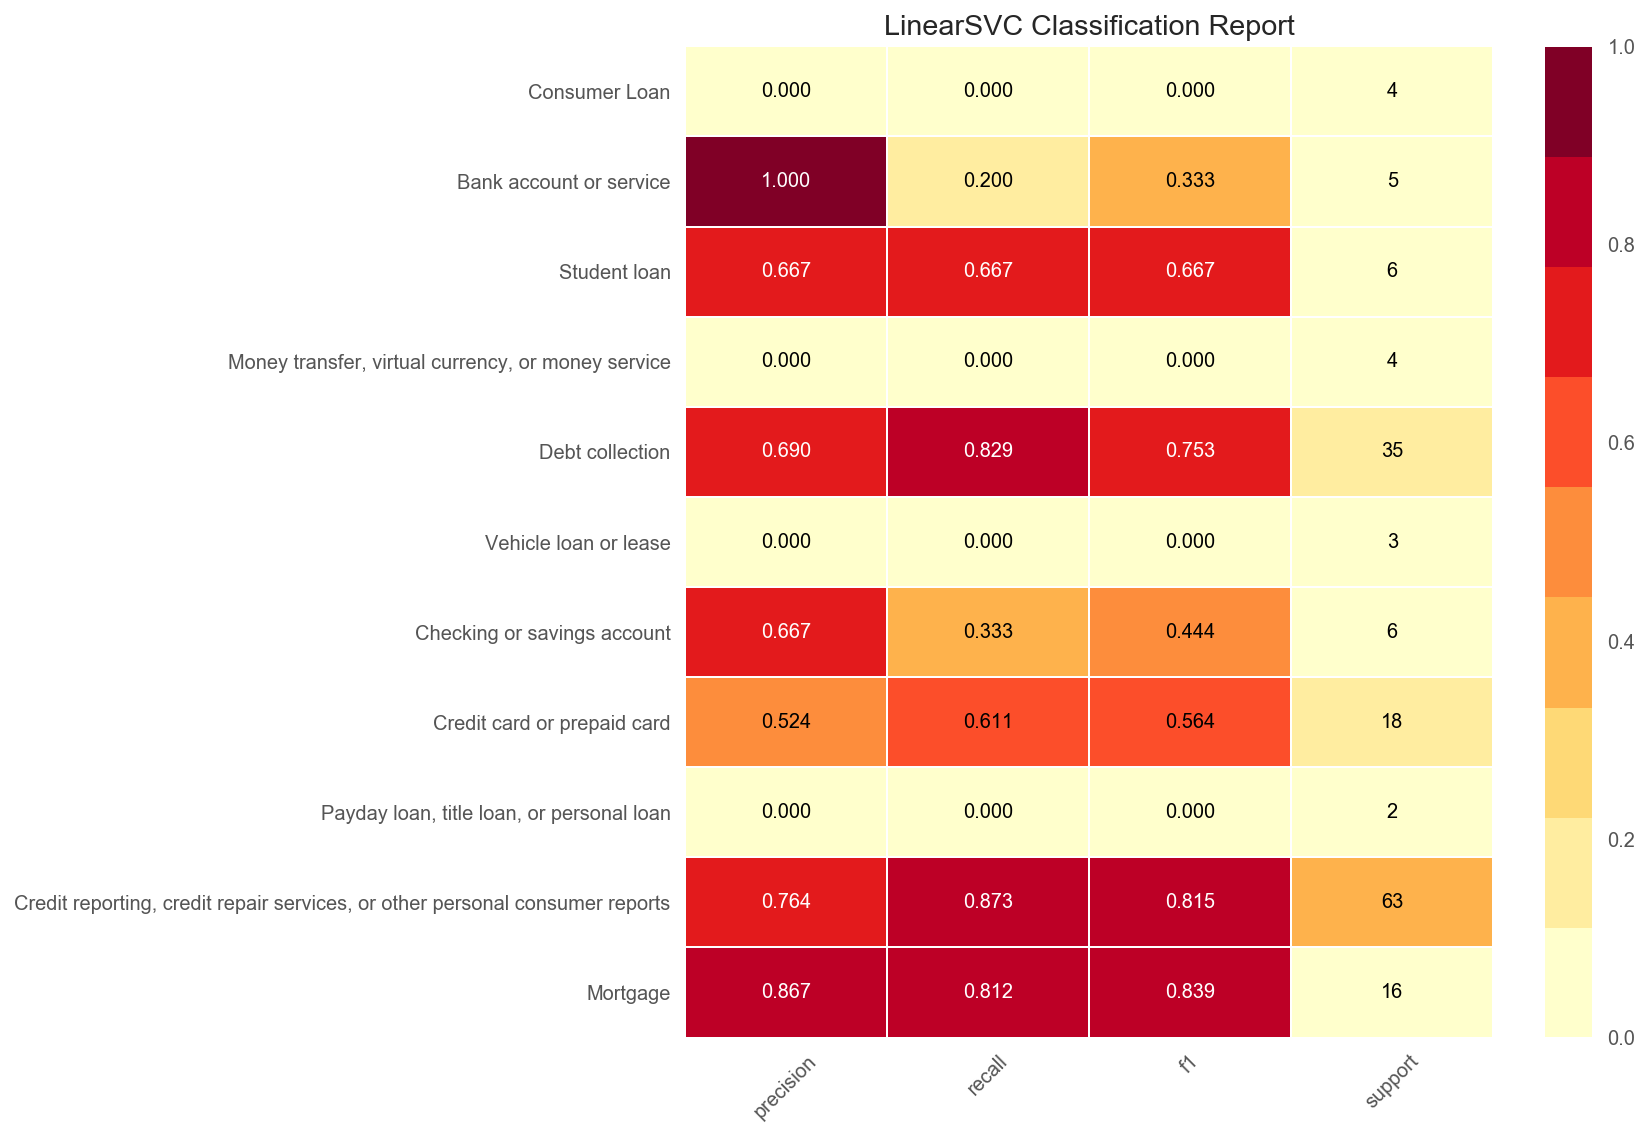

In [107]:
def viz_metrics(visualizer):
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    return visualizer.poof()

for clf in classifiers:
    plt.close()
    fig,ax = plt.subplots(figsize=(12,8))
    visualizer = ClassificationReport(clf, classes=classes, support=True)
    viz_metrics(visualizer)

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


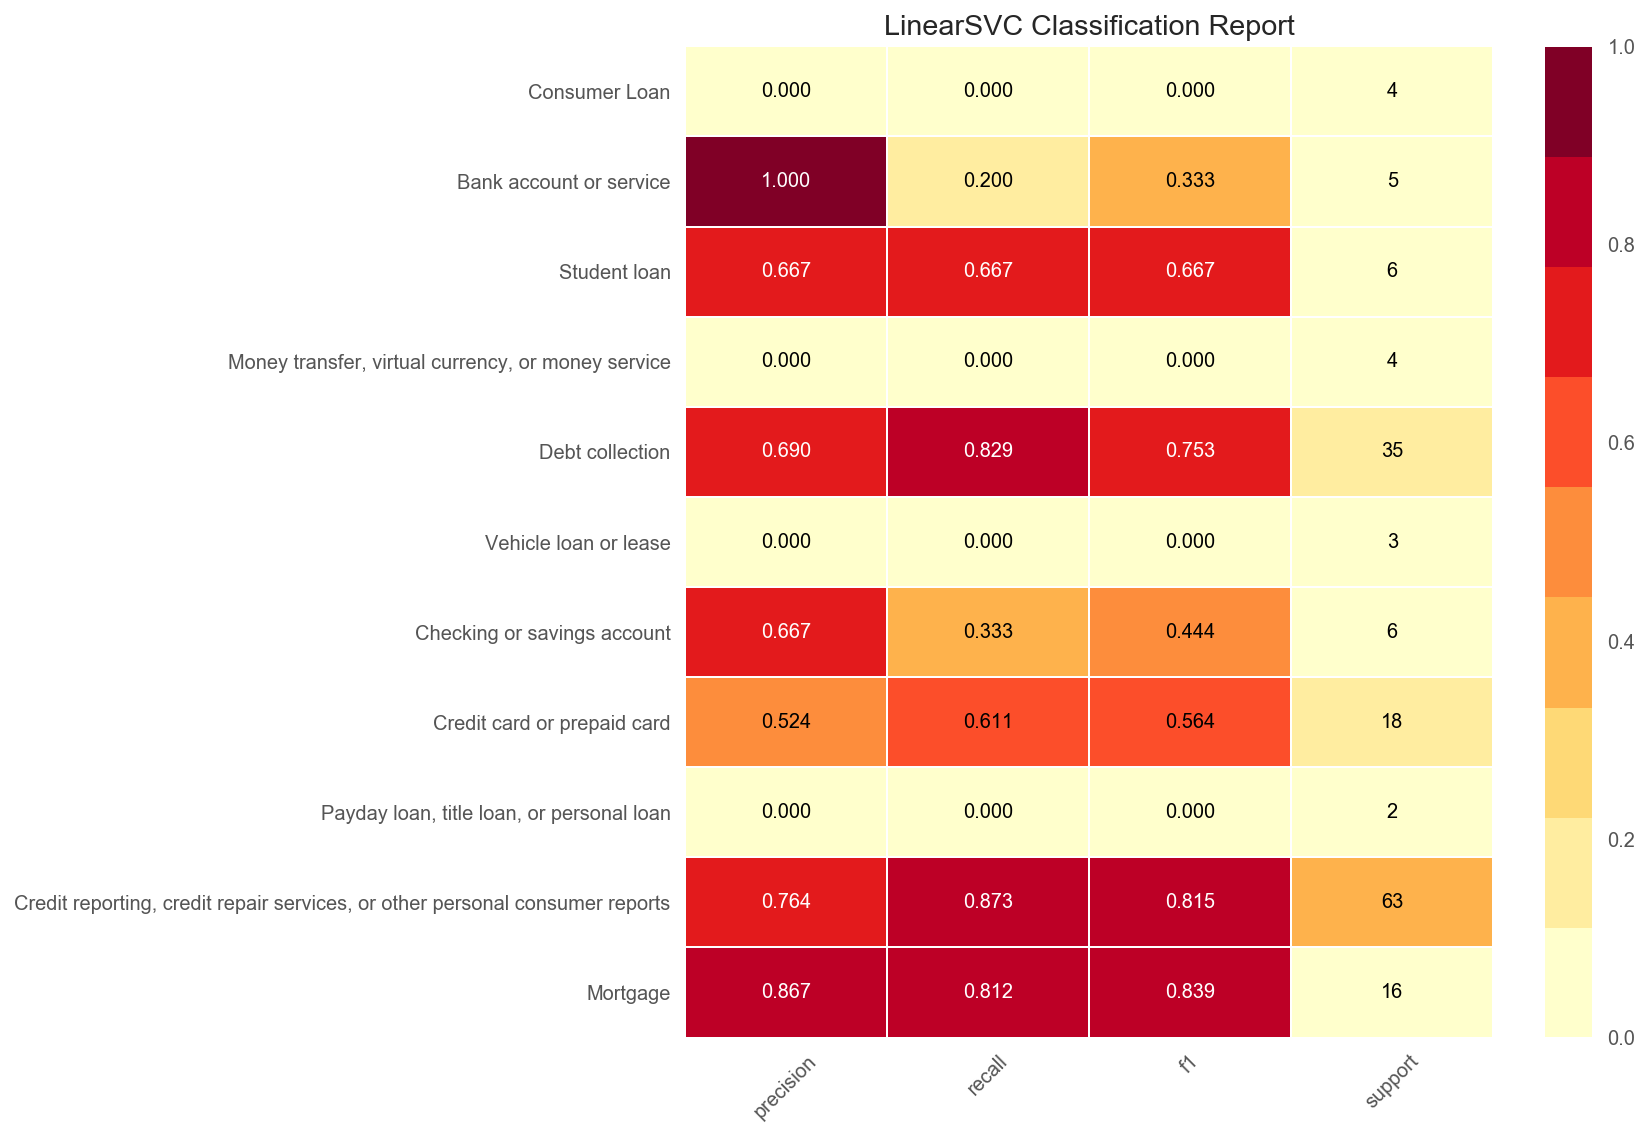

In [108]:
fig,ax = plt.subplots(figsize=(12,8))
visualizer = ClassificationReport(model, classes=classes, support=True)
out = viz_metrics(visualizer)
out.figure.savefig('../images/classification_report.png',dpi=100)

In [109]:
type(out)

matplotlib.axes._subplots.AxesSubplot

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


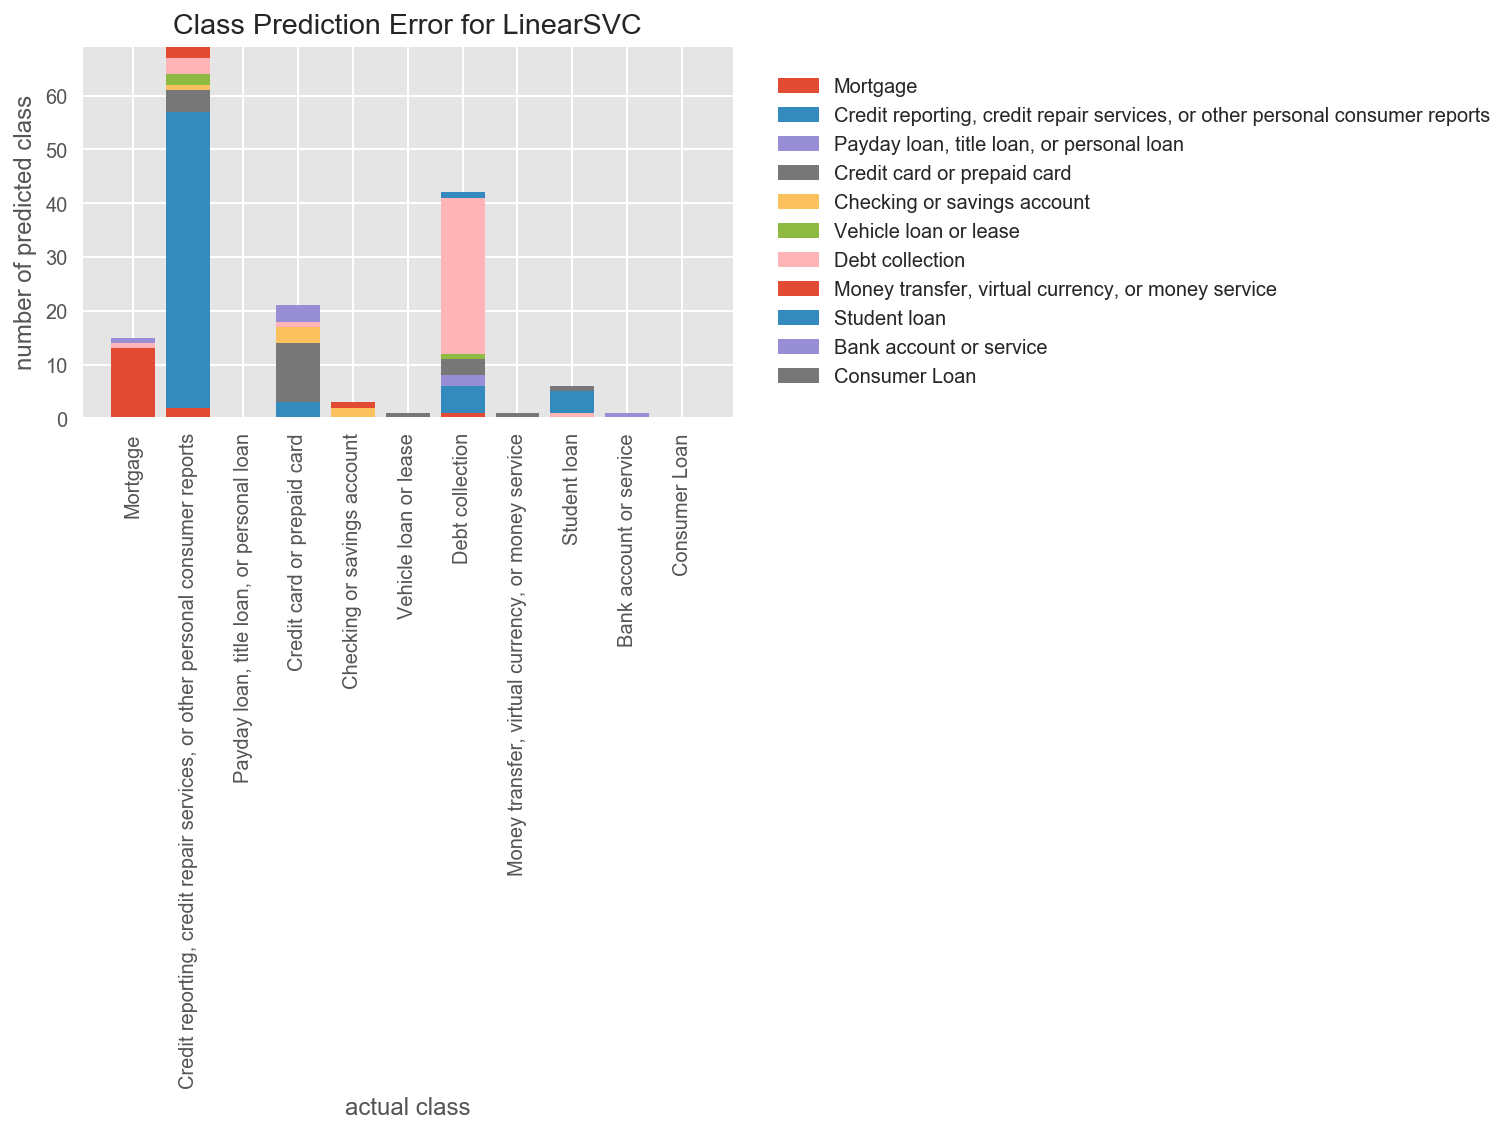

In [110]:
fig,ax = plt.subplots(figsize=(12,8))
visualizer = ClassPredictionError(LinearSVC(), classes=classes)
out = viz_metrics(visualizer)
out.figure.savefig('../images/class_prediction_error.png',dpi=100)

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


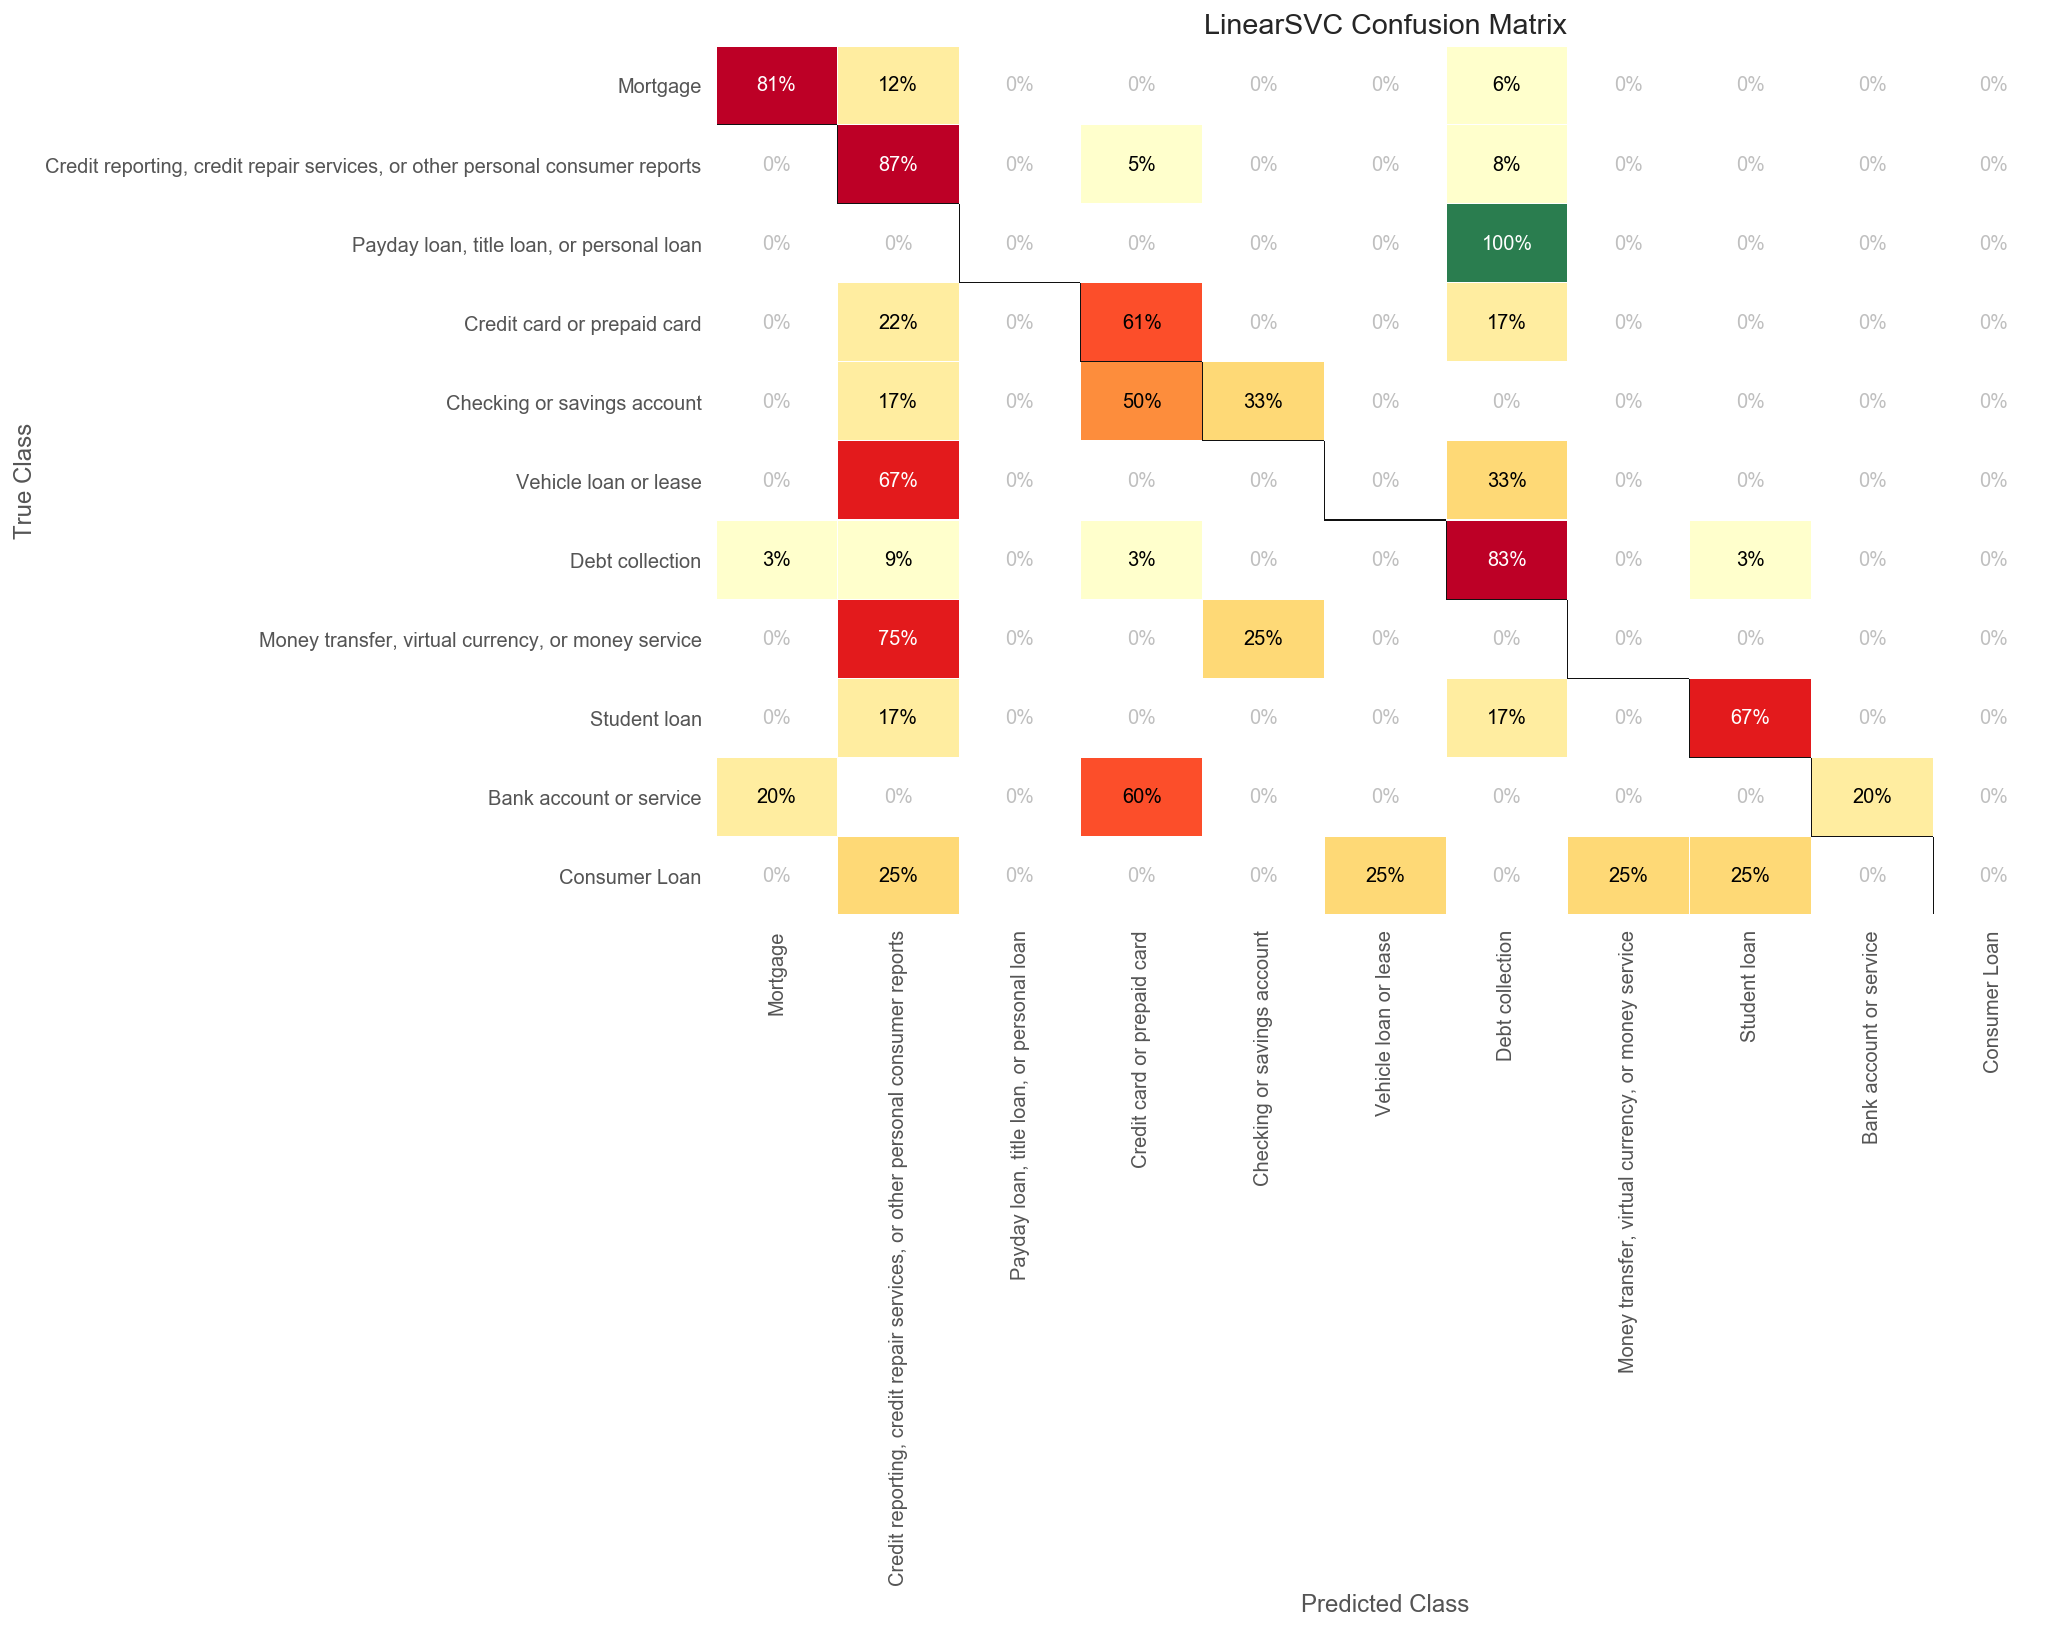

In [111]:
fig,ax = plt.subplots(figsize=(12,8))
visualizer = ConfusionMatrix(model, classes=classes,percent=True)
out = viz_metrics(visualizer)
out.figure.savefig('../images/confusion_matrix.png',dpi=100)

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


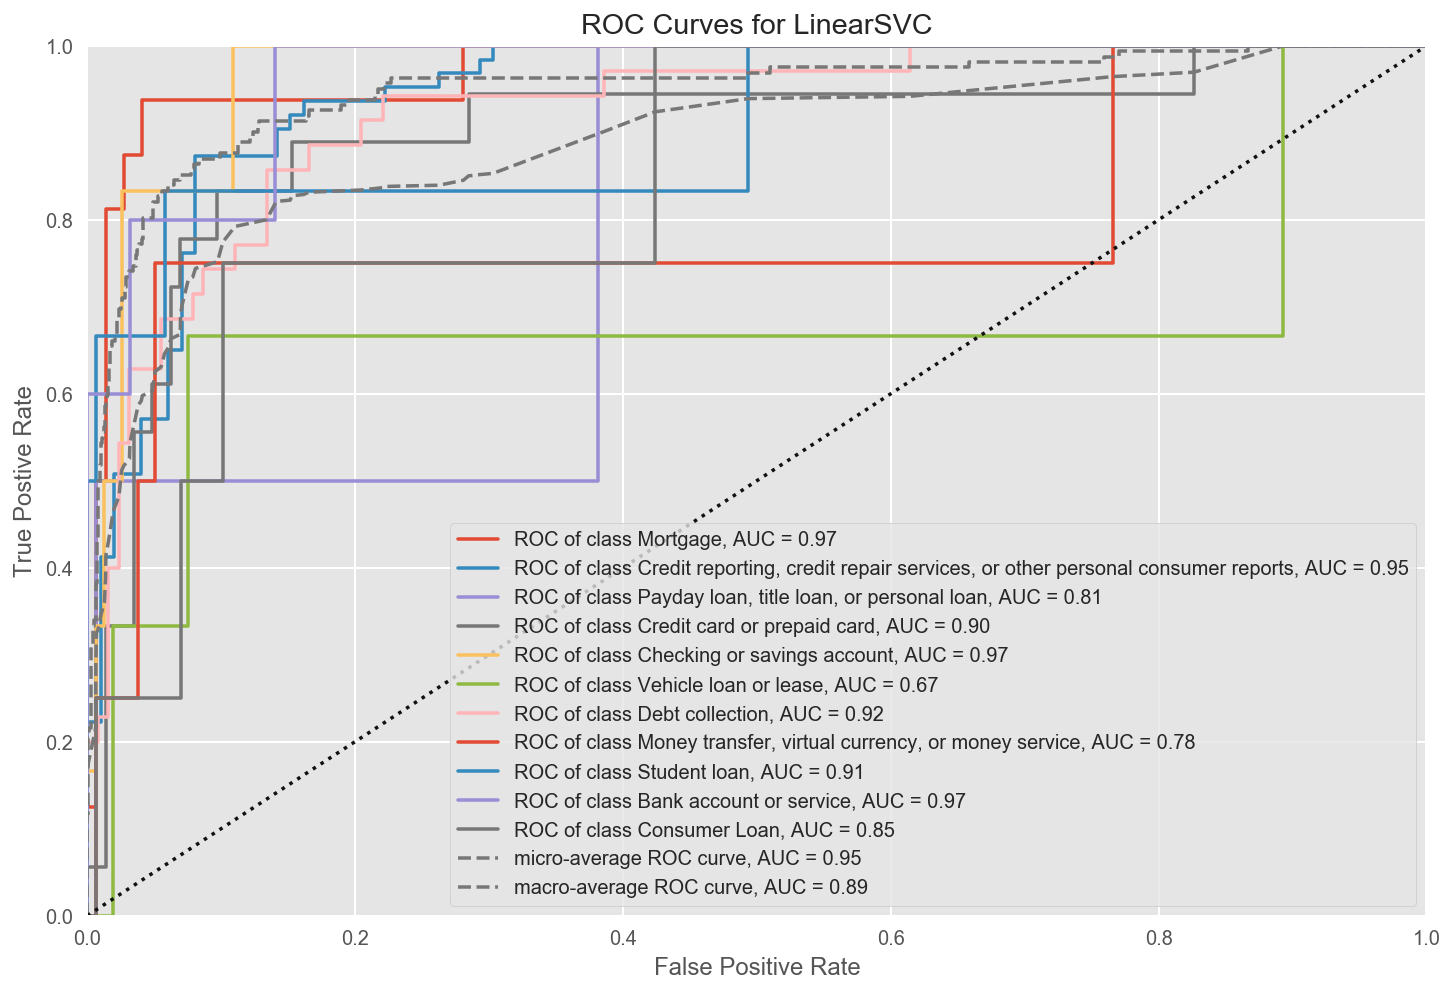

In [112]:
# ROC-AUC
fig,ax = plt.subplots(figsize=(12,8))
visualizer = ROCAUC(model, classes=classes)
out = viz_metrics(visualizer)
out.figure.savefig('../images/roc_auc.png',dpi=100)

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


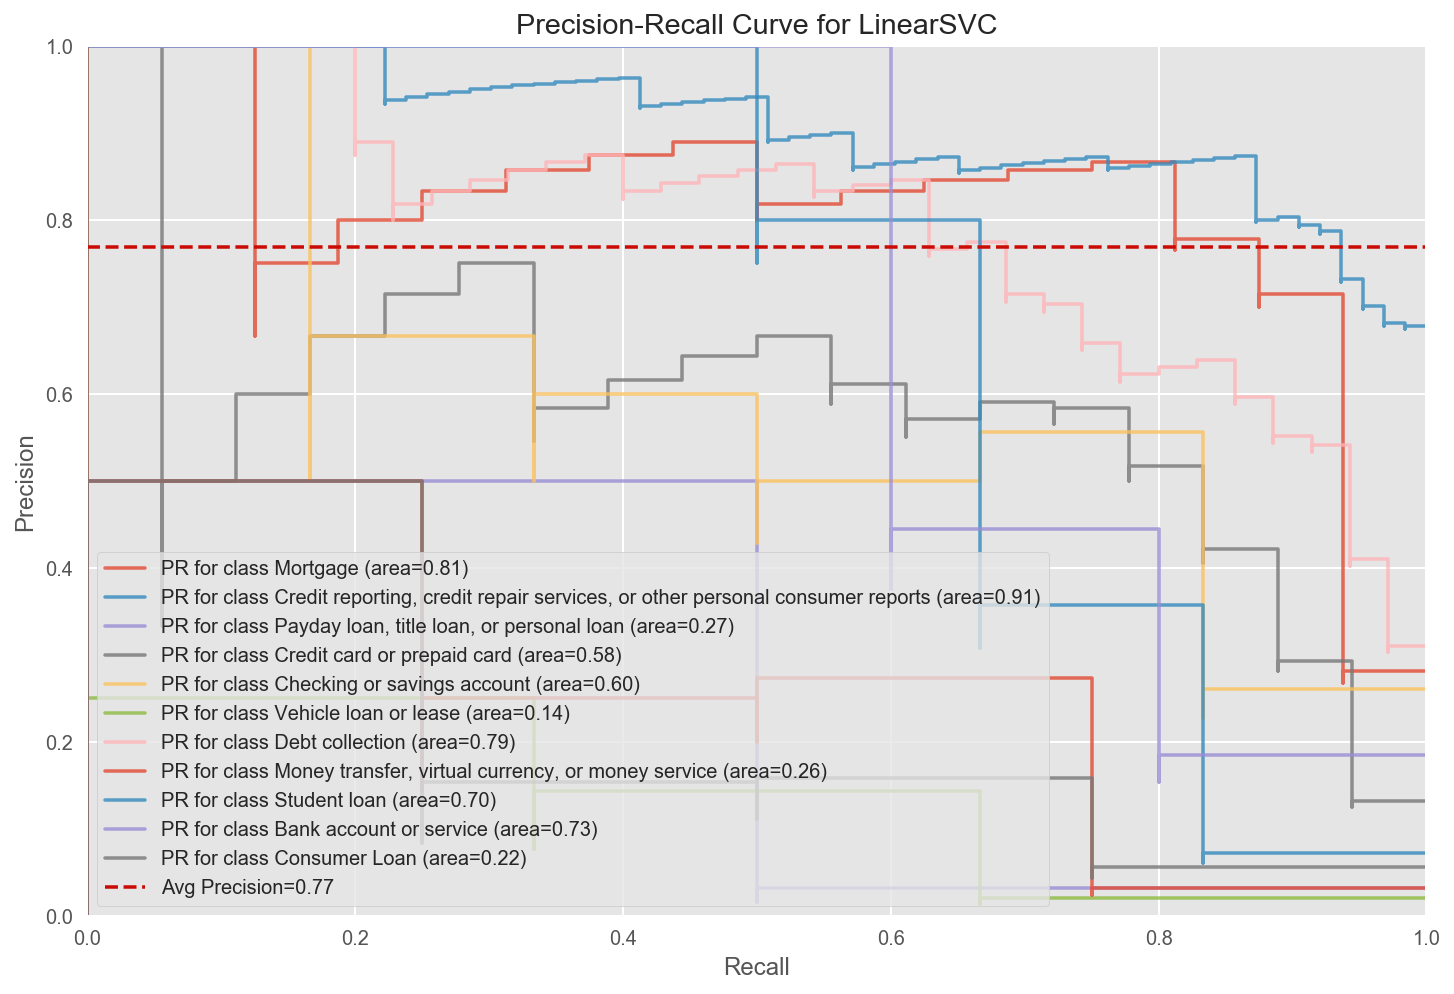

In [113]:
# Precision Recall Curve
fig,ax = plt.subplots(figsize=(12,8))
visualizer = PrecisionRecallCurve(model,classes=classes,per_class=True,
                                  iso_f1_curves=False,fill_area=False, micro=False)
out = viz_metrics(visualizer)
out.figure.savefig('../images/precision_recall.png',dpi=100)

# Mis-classified Cases

In [114]:
ser_id_to_product

0                                                                         Mortgage
1     Credit reporting, credit repair services, or other personal consumer reports
2                                        Payday loan, title loan, or personal loan
3                                                      Credit card or prepaid card
4                                                      Checking or savings account
5                                                            Vehicle loan or lease
6                                                                  Debt collection
7                               Money transfer, virtual currency, or money service
8                                                                     Student loan
9                                                          Bank account or service
10                                                                   Consumer Loan
Name: 0, dtype: object

In [115]:
for predicted in ser_id_to_product.index:
    for actual in ser_id_to_product.index:
        if predicted != actual and conf_mat[actual, predicted] >= 20:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_product[actual], 
                                                               id_to_product[predicted], 
                                                               conf_mat[actual, predicted]))
            # indices_test is from train-test split
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['product', 
                                                                    'complaint']])
            print('')

# Most correlated terms with each category

In [116]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
#                         ngram_range=(1, 2), 
#                         stop_words='english')

# # create vectors
# features = tfidf.fit_transform(df['complaint_clean']).toarray()
# labels = df['category_id']

model = LinearSVC()
model.fit(features, labels)

LinearSVC()

In [124]:
def get_top_N_correlated(N=4):
    products,top_uni,top_bi = [],[],[]
    for category_id, product in ser_id_to_product.iteritems():
        indices = np.argsort(model.coef_[category_id])
        feature_names = np.array(tfidf.get_feature_names())[indices]
        unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
        bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
        products.append(product)
        top_uni.append(', '.join(unigrams[-N:]))
        top_bi.append(', '.join(bigrams[-N:]))
    # dataframe
    df_top_corr = pd.DataFrame({'product': products,
                                'unigram': top_uni,
                                'bigram': top_bi})
    
    return df_top_corr

df_top_corr = get_top_N_correlated(N=4)
df_top_corr.style.set_caption('Top Correlated Terms per Category')

,product,unigram,bigram
0,Mortgage,"bank, deposited, estate, check","close acount, xx xxxxxx, report information, bank america"
1,"Credit reporting, credit repair services, or other personal consumer reports","debit, checking, lost, busines","debit card, checking acount, caled bank, closed acount"
2,"Payday loan, title loan, or personal loan","people, financial, car, loan","paid xx, ben paid, acount paid, make payment"
3,Credit card or prepaid card,"card, capital, statement, ap","customer service, card xx, credit card, incorect information"
4,Checking or savings account,"credit, equifax, experian, acounts","credit report, late xx, payment history, reporting agency"
5,Vehicle loan or lease,"debt, colection, cal, colections","dispute xx, acount number, debt colector, said nt"
6,Debt collection,"fund, transfer, like, completely","acount day, xx bank, xx sent, day later"
7,"Money transfer, virtual currency, or money service","mortgage, modification, ditech, refinance","mortgage company, chapter xx, mortgage payment, short sale"
8,Student loan,"didnt, income, aply, loan","located xx, money xx, loan loan, aplied loan"
9,Bank account or service,"navient, loan, student, aford","student loan, xxxx paid, xxxx xxxx, payment plan"


# Predictions

In [118]:
X = df['complaint_clean'] # documents
y = df['product'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = SEED)

In [119]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [120]:
# Save the fitted model (model persistence)
joblib.dump(model, '../models/tfidf.pkl')

['../models/tfidf.pkl']

In [121]:
new_complaint = """Hello : ditech.com is my mortgagecompany.
They placed an automatic forbearance on my account
and removed my auto payment after
Hurricane Irma. 
I called about a week after the storm
to ask that they remove the forbearance
and return the auto payment.
This was confirm by the agent
and recorded by them. 
I received a letter just a few 
weeks ago stating that my auto payment
was never returned and the agent who
I spoke with after I received the
letter actually read back the notes
confirming that I called and asked 
to have forbearance removed and auto
payment reinstated.
So I asked again the agent 
to remove the forbearance and install auto payment.
\n\nI called this past week to check 
if this was done yet, and the agent
at that time said I still have 
a forbearance and no auto payment.
\n\nAs I right this complaint,
I spoke with an agent today that
informs me that I dont have auto 
payment and forbearance is still active.
She placed me on hold, which has lasted an hour.
\n\nDitech is not responsive,
and it is purposely choosing 
to keep my in forbearance when
I have asked countless times to remove me.
I also have asked countless times 
to reinstate auto payment and yet 
they choose not to listen.
\n\nPlease help XXXX XXXX, XXXX"""

In [122]:
model_loaded = joblib.load('../models/tfidf.pkl')
new_comp_vec = fitted_vectorizer.transform([new_complaint])
pred = model_loaded.predict(new_comp_vec)

print(pred)

['Mortgage']


# Total Time Taken

In [123]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 0 min 9 secs
